In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings

In [147]:
df = pd.read_csv("C:/Users/jeffin/Documents/Dataset09-Employee-salary-prediction.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [148]:
df.shape

(375, 6)

In [149]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [150]:
df.columns = ["Age","Gender","Degree","Job Title","Experience_years","Salary"]

In [151]:
df.dtypes

Age                 float64
Gender               object
Degree               object
Job Title            object
Experience_years    float64
Salary              float64
dtype: object

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job Title         373 non-null    object 
 4   Experience_years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [153]:
df[df.duplicated]

,Age,Gender,Degree,Job Title,Experience_years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [154]:
df = df.drop_duplicates(keep="first")
df.shape

(325, 6)

In [155]:
df.isnull().sum()

Age                 1
Gender              1
Degree              1
Job Title           1
Experience_years    1
Salary              1
dtype: int64

In [156]:
df.dropna(how = "any",inplace = True)

In [157]:
df.shape

(324, 6)

In [158]:
df.describe()

,Age,Experience_years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [159]:
corr = df[["Age","Experience_years","Salary"]].corr()
corr 

,Age,Experience_years,Salary
Age,1.000000,0.979192,0.916543
Experience_years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

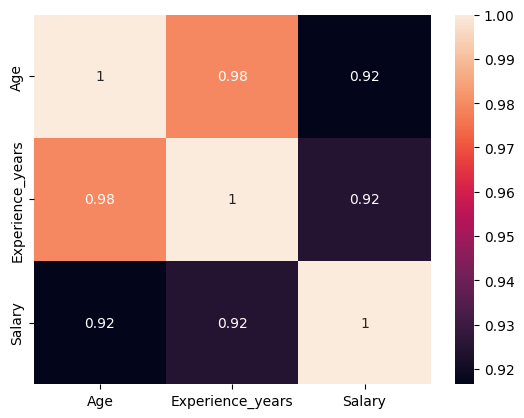

In [160]:
sns.heatmap(data =corr,annot=True)

In [161]:
df["Degree"].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Degree'>

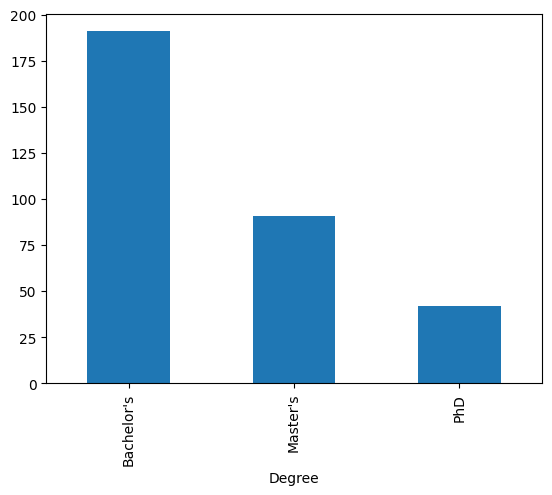

In [162]:
df["Degree"].value_counts().plot(kind="bar")

In [163]:
df["Job Title"].value_counts()

Job Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [164]:
df["Job Title"].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<Axes: ylabel='Job Title'>

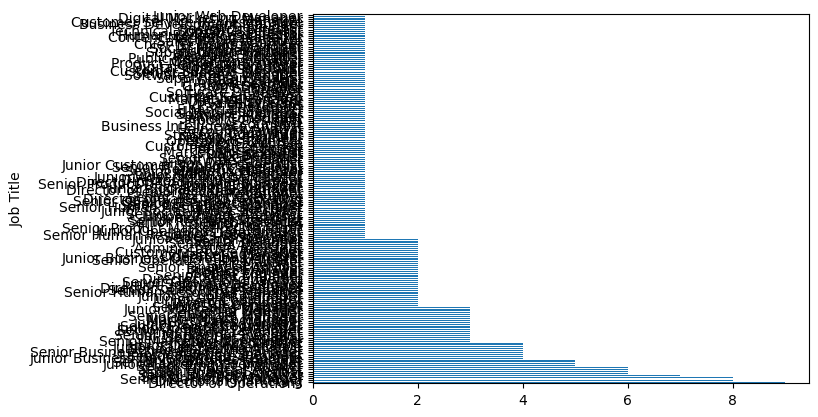

In [165]:
df["Job Title"].value_counts().plot(kind="barh")

In [166]:
df["Gender"].value_counts()

Gender
Male      170
Female    154
Name: count, dtype: int64

<Axes: xlabel='Gender'>

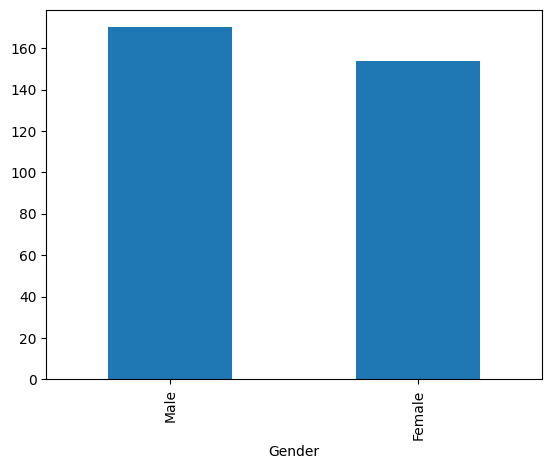

In [167]:
df["Gender"].value_counts(ascending= False).plot(kind="bar")

<Axes: ylabel='Frequency'>

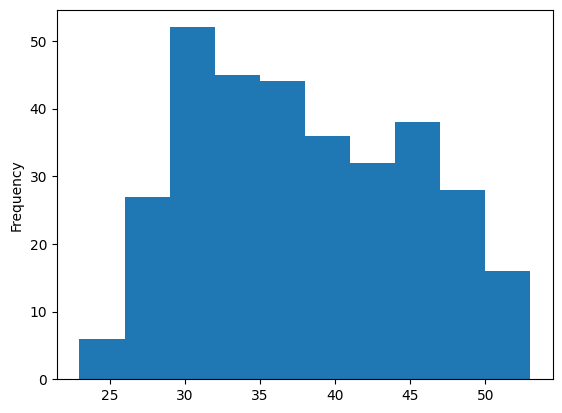

In [168]:
df["Age"].plot(kind="hist")

<Axes: >

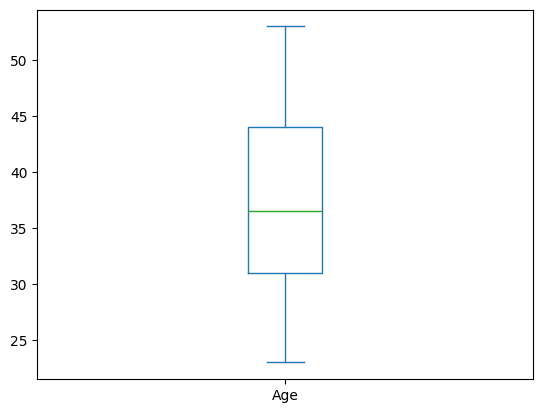

In [169]:
df.Age.plot(kind="box")

<Axes: >

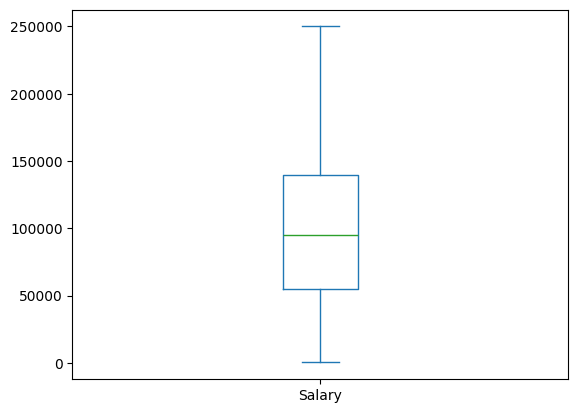

In [170]:
df["Salary"].plot(kind="box")

<Axes: ylabel='Frequency'>

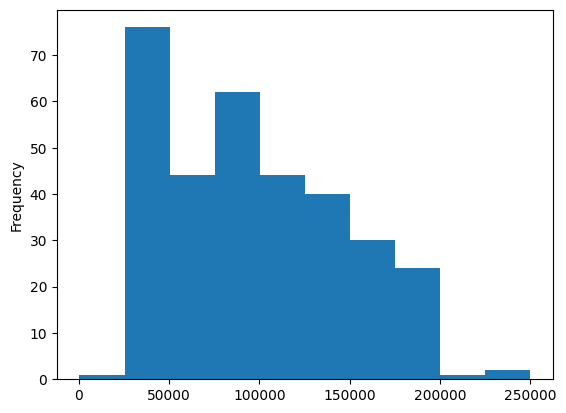

In [171]:
df["Salary"].plot(kind="hist")

In [172]:
df.head()

,Age,Gender,Degree,Job Title,Experience_years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [173]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [174]:
df["Gender_Encode"] = Label_Encoder.fit_transform(df["Gender"])

In [175]:
df["Job_Title_Encode"] = Label_Encoder.fit_transform(df["Job Title"])

In [176]:
df["Degree_Encode"] = Label_Encoder.fit_transform(df["Degree"])

In [177]:
df.head()

,Age,Gender,Degree,Job Title,Experience_years,Salary,Gender_Encode,Job_Title_Encode,Degree_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,159,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,17,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,130,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,101,0
4,52.0,Male,Master's,Director,20.0,200000.0,1,22,1


In [178]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [179]:
df["Age_scaled"] = std_scaler.fit_transform(df[["Age"]])
df["Experience_years_scaled"] = std_scaler.fit_transform(df[["Experience_years"]])

In [180]:
df.head()

,Age,Gender,Degree,Job Title,Experience_years,Salary,Gender_Encode,Job_Title_Encode,Degree_Encode,Age_scaled,Experience_years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,159,0,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,17,1,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,130,2,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,101,0,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,22,1,2.037324,1.497148


In [181]:
X = df[["Age_scaled","Gender_Encode","Degree_Encode","Job_Title_Encode","Experience_years_scaled"]]
y = df["Salary"]

In [182]:
X.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [185]:
x_train.shape,y_train.shape # 80 %

((259, 5), (259,))

In [186]:
x_test.shape # 20%

(65, 5)

In [187]:
x_test.shape , y_test.shape

((65, 5), (65,))

In [188]:
x_train.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_years_scaled
73,-1.307742,1,0,166,-1.213615
182,0.922302,0,2,155,0.744158
17,0.225413,1,2,116,0.292364
24,0.504169,1,1,37,0.442962
146,0.643547,0,2,115,0.894756


In [189]:
from sklearn.linear_model import LinearRegression

In [190]:
Linear_Regression_model = LinearRegression()

In [191]:
Linear_Regression_model.fit(x_train,y_train)

LinearRegression()

In [192]:
y_pred_lr = Linear_Regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [193]:
df = pd.DataFrame({"y_Actual" : y_test,"y_Predicted":y_pred_lr})
df["Error"] = df["y_Actual"] - df["y_Predicted"]
df["abs_error"] = abs(df["Error"])
Mean_absolute_Error = df["abs_error"].mean()
Mean_absolute_Error 

10570.78640113616

In [194]:
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [195]:
r2_score(y_test,y_pred_lr)

0.8911231066517091

In [196]:
print(f"Accuracy Of the Model= {round(r2_score(y_test,y_pred_lr),4)*100}%")

Accuracy Of the Model= 89.11%


In [197]:
round(mean_absolute_error(y_test,y_pred_lr),2)
print(f"Mean Absolute Error= {round(mean_absolute_error(y_test,y_pred_lr),2)}")

Mean Absolute Error= 10570.79


In [198]:
mse = round(mean_squared_error(y_test,y_pred_lr),2)
mse

205754135.72

In [199]:
print(f"Mean Squared Error = {round(mean_squared_error(y_test,y_pred_lr),2)}")

Mean Squared Error = 205754135.72


In [200]:
print("Root Mean Squared Error (RMSE) = " , mse**(0.5))

Root Mean Squared Error (RMSE) =  14344.132449193294


Coefficients :

In [201]:
Linear_Regression_model.coef_

array([2.01818940e+04, 7.38907834e+03, 1.54227359e+04, 1.95769562e+01,
       1.92043082e+04])

In [202]:
Linear_Regression_model.intercept_

86001.49320553176

In [203]:
df.head()

,y_Actual,y_Predicted,Error,abs_error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305


Age = 49
Gender = "Female"=0
Degree = "PhD" = 2
Job_Title = "Director" = 22
Experience_years = 15
Salary = ?

In [204]:
Age = std_scaler.transform([[49]])
Age = 5.8644867
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815
# Find the Salary

C:\Users\jeffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\jeffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [205]:
Emp_Salary = Linear_Regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
Emp_Salary

C:\Users\jeffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.14920454])

In [208]:
print("Salary of the Employee with Above Attributes = ",Emp_Salary[0])

Salary of the Employee with Above Attributes =  249925.1492045431
